<a href="https://colab.research.google.com/github/GabrielRibeiroRodrigues/Reconhecimento-de-placas-utilizando-YOLOv5/blob/main/LPR_utilizando_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clonagem do repositório com as dependências que faltam na pasta clonada no drive

In [1]:


# Clonar o repositório YOLOv5
!git clone https://github.com/ultralytics/yolov5

# Mudar para o diretório YOLOv5
%cd yolov5

# Instalar as dependências
!pip install -U -r requirements.txt


/content
/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)


#Treinamento do YOLO



Crio a pasta images onde vou ter as subpastas train e val onde vou colocar as imagens (png/jpeg) para treino e validação,também crio a pasta labels onde vou ter as subpastas train e val para as informações de onde está delimitada a placa para o treinamento do yolo


In [ ]:
import os

# Caminho para o diretório base do YOLOv5
base_dir = '/content/yolov5/'

# Diretórios que você deseja criar
dirs_to_create = [
    'images/train',
    'images/val',
    'labels/train',
    'labels/val'
]

# Criar os diretórios se não existirem
for subdir in dirs_to_create:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)


Crio o diretório data se caso ele ainda não existir, é no data onde eu crio o dataset.yaml, o dataset.yaml é onde defino os caminhos para treinamento e validação, também defino o número de classes e os nomes da classes

In [ ]:
  # Crie o diretório data se ele não existir
os.makedirs('/content/yolov5/data', exist_ok=True)

# Crie o arquivo dataset.yaml no diretório correto
dataset_yaml_content = """
train: /content/yolov5/images/train
val: /content/yolov5/images/val

nc: 1
names: ['placa']
"""

# Salve o conteúdo no arquivo dataset.yaml
with open('/content/yolov5/data/dataset.yaml', 'w') as file:
    file.write(dataset_yaml_content)


Esse é o comando para o treinamento, onde em 'img' defino a escala da minha img, em 'batch' defino ... , em 'epochs' defino ..., e tambem do o caminho para o meu dataset.yaml que está com os nomes e quantidade de classes, e após o treinamento ele salva em runs/train os pesos que você treinou 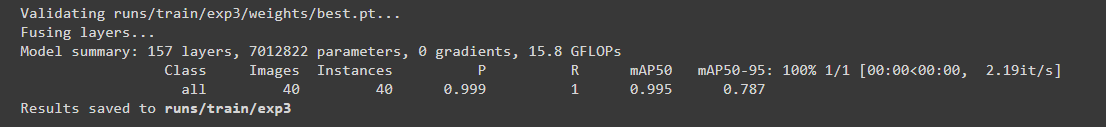

In [ ]:
!python train.py --img 416 --batch 32 --epochs 100 --data /content/yolov5/data/dataset.yaml --weights yolov5s.pt --cache


2024-09-24 12:21:12.135751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 12:21:12.396635: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 12:21:12.471917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False,

# Reconhecimento de Caracteres

In [3]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,156 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,585 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,318 kB]
Get:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 k

#Testar o reconhecimento de placas

Escolho a imagem que quero aplicar o reconhecimento de placas

In [86]:
from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded))

Saving a.png to a (2).png


Esta é a principal parte do código, em model = torch.hub.load(...) eu estou carregando o meu modelo já treinado que vai estar localizado em runs/train lá ira ter varios exp e então terei que escolher qual modelo eu vou usar, em file_path vou colocar o nome da minha imagem, na img eu vou ler a imagem usando a biblioteca opencv2,

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-9-30 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


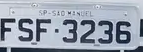

Tentativa 1: FSF3236
Tentativa (pré-processamento) 1: FSF3236
Tentativa 2: FSF3236
Tentativa (pré-processamento) 2: FSF3236
Tentativa 3: FSF3236
Tentativa (pré-processamento) 3: FSF3236
Tentativa 4: FSF3236
Tentativa (pré-processamento) 4: FSF3236


Saved 1 image to runs/detect/exp51


Tentativa 5: FSF3236
Tentativa (pré-processamento) 5: FSF3236
Placa válida: FSF3236


In [91]:
import cv2
import torch
import pytesseract
from google.colab.patches import cv2_imshow
import re
from collections import Counter

# Função para validar o formato da placa (ABC-1234)
def validar_placa(texto_placa):
    if not (7 <= len(texto_placa) <= 9):
        return False

    padrao = r'^[A-Z]{3}[0-9]{4}$'
    padrao2 = r'^[A-Z]{3}[0-9]{1}[A-Z]{1}[0-9]{2}'

    return bool(re.match(padrao, texto_placa)) or bool(re.match(padrao2, texto_placa))

# Carregar o modelo YOLOv5 treinado
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp2/weights/best.pt')

# Caminho para a imagem
file_path = file_name

# Carregar a imagem usando OpenCV
img = cv2.imread(file_path)

# Realizar a inferência
results = model(img)

# Verificar se alguma placa foi detectada
if results.xyxy[0].shape[0] == 0:
    print("Nenhuma placa foi detectada.")
else:
    # Iterar sobre as detecções e processar apenas a classe 'placa'
    for det in results.xyxy[0]:
        if det[-1] == 0:  # Verificar se a classe detectada é 'placa'
            x1, y1, x2, y2 = int(det[0]), int(det[1]), int(det[2]), int(det[3])
            plate_img = img[y1:y2, x1:x2]  # Cortar a região da placa

            # Exibir e salvar a imagem da placa cortada
            cv2_imshow(plate_img)
            cv2.imwrite('detected_plate.png', plate_img)

            # Função para tentar o OCR com pré-processamento adicional
            def tentar_novamente_ocr(img):
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
                clahe_img = clahe.apply(blur_img)

                # Tentar novamente o OCR com a imagem pré-processada
                plate_text = pytesseract.image_to_string(clahe_img, config='--psm 8 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
                return plate_text.strip()

            # Aplicar OCR com Tesseract na imagem cortada
            plate_texts = []
            for i in range(5):  # Tentar 5 vezes
                plate_text = pytesseract.image_to_string(plate_img, config='--psm 8 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
                plate_texts.append(plate_text.strip())
                print(f"Tentativa {i+1}: {plate_text.strip()}")  # Imprimir o texto reconhecido

                # Tentar o OCR novamente com pré-processamento adicional
                plate_text_novamente = tentar_novamente_ocr(plate_img)
                plate_texts.append(plate_text_novamente)
                print(f"Tentativa (pré-processamento) {i+1}: {plate_text_novamente.strip()}")  # Imprimir o texto reconhecido

            # Contar as ocorrências dos textos reconhecidos
            contador = Counter(plate_texts)
            textos_frequentes = contador.most_common()  # Todos os textos com suas contagens

            # Verificar a validade dos textos reconhecidos a partir do mais frequente
            for texto, _ in textos_frequentes:
                if validar_placa(texto):
                    print("Placa válida:", texto)
                    break  # Interrompe a execução se a placa for válida
            else:
                print("Nenhuma placa válida encontrada.")

# Salvar a imagem com as detecções do YOLOv5
results.save('output_image.jpg')


#Compactar e Descompactar arquivos do drive

In [90]:
#Conecta com o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset https://universe.roboflow.com/trafficbr/vehicle-plate-color/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true


In [32]:
#Copia a pasta do yolo do drive
!cp -r /content/drive/MyDrive/origin/my_folder.zip /content/


In [33]:
#Descompacta
!unzip /content/my_folder.zip -d /content/


Archive:  /content/my_folder.zip
   creating: /content/content/yolov5/
   creating: /content/content/yolov5/segment/
  inflating: /content/content/yolov5/segment/predict.py  
  inflating: /content/content/yolov5/segment/tutorial.ipynb  
  inflating: /content/content/yolov5/segment/train.py  
  inflating: /content/content/yolov5/segment/val.py  
  inflating: /content/content/yolov5/detect.py  
   creating: /content/content/yolov5/classify/
  inflating: /content/content/yolov5/classify/predict.py  
  inflating: /content/content/yolov5/classify/tutorial.ipynb  
  inflating: /content/content/yolov5/classify/train.py  
  inflating: /content/content/yolov5/classify/val.py  
  inflating: /content/content/yolov5/benchmarks.py  
   creating: /content/content/yolov5/utils/
  inflating: /content/content/yolov5/utils/activations.py  
   creating: /content/content/yolov5/utils/docker/
  inflating: /content/content/yolov5/utils/docker/Dockerfile  
  inflating: /content/content/yolov5/utils/docker/Do

In [2]:
#EXCLUIR PASTAS CHEIAS
!rm -r /content/content/


In [ ]:
#Backup
!zip -r my_folder.zip /content/yolov5/
!mv my_folder.zip /content/drive/MyDrive/origin/

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/segment/ (stored 0%)
  adding: content/yolov5/segment/predict.py (deflated 70%)
  adding: content/yolov5/segment/tutorial.ipynb (deflated 73%)
  adding: content/yolov5/segment/train.py (deflated 69%)
  adding: content/yolov5/segment/val.py (deflated 67%)
  adding: content/yolov5/detect.py (deflated 71%)
  adding: content/yolov5/classify/ (stored 0%)
  adding: content/yolov5/classify/predict.py (deflated 68%)
  adding: content/yolov5/classify/tutorial.ipynb (deflated 80%)
  adding: content/yolov5/classify/train.py (deflated 65%)
  adding: content/yolov5/classify/val.py (deflated 65%)
  adding: content/yolov5/benchmarks.py (deflated 73%)
  adding: content/yolov5/utils/ (stored 0%)
  adding: content/yolov5/utils/activations.py (deflated 69%)
  adding: content/yolov5/utils/docker/ (stored 0%)
  adding: content/yolov5/utils/docker/Dockerfile (deflated 55%)
  adding: content/yolov5/utils/docker/Dockerfile-cpu (deflated 51%)
  add

Dataset "https://universe.roboflow.com/ds/zsQEkaF0m0?key=EOjvitYbIB"
Placa mercosul "https://universe.roboflow.com/ds/GJyBTf7HxW?key=tJ3pzyv2sz"